
**Importing libraries :**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import read_csv

Step 1: Reading and Understanding the Data

Let's start with the following steps:


* Importing data using the pandas library

* Understanding the structure of the data




In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=read_csv('housing.csv',header=None,delimiter=r"\s+",names=column_names)
data.rename(columns={'MEDV':'PRICE'},inplace=True)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Feature Engineering**

In [4]:
data.shape

(506, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Cleaning**

In [7]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [8]:
#Checking for duplicates
data.loc[data.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


**Exploratory Data Analysis**:

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column PRICE outliers = 7.91%


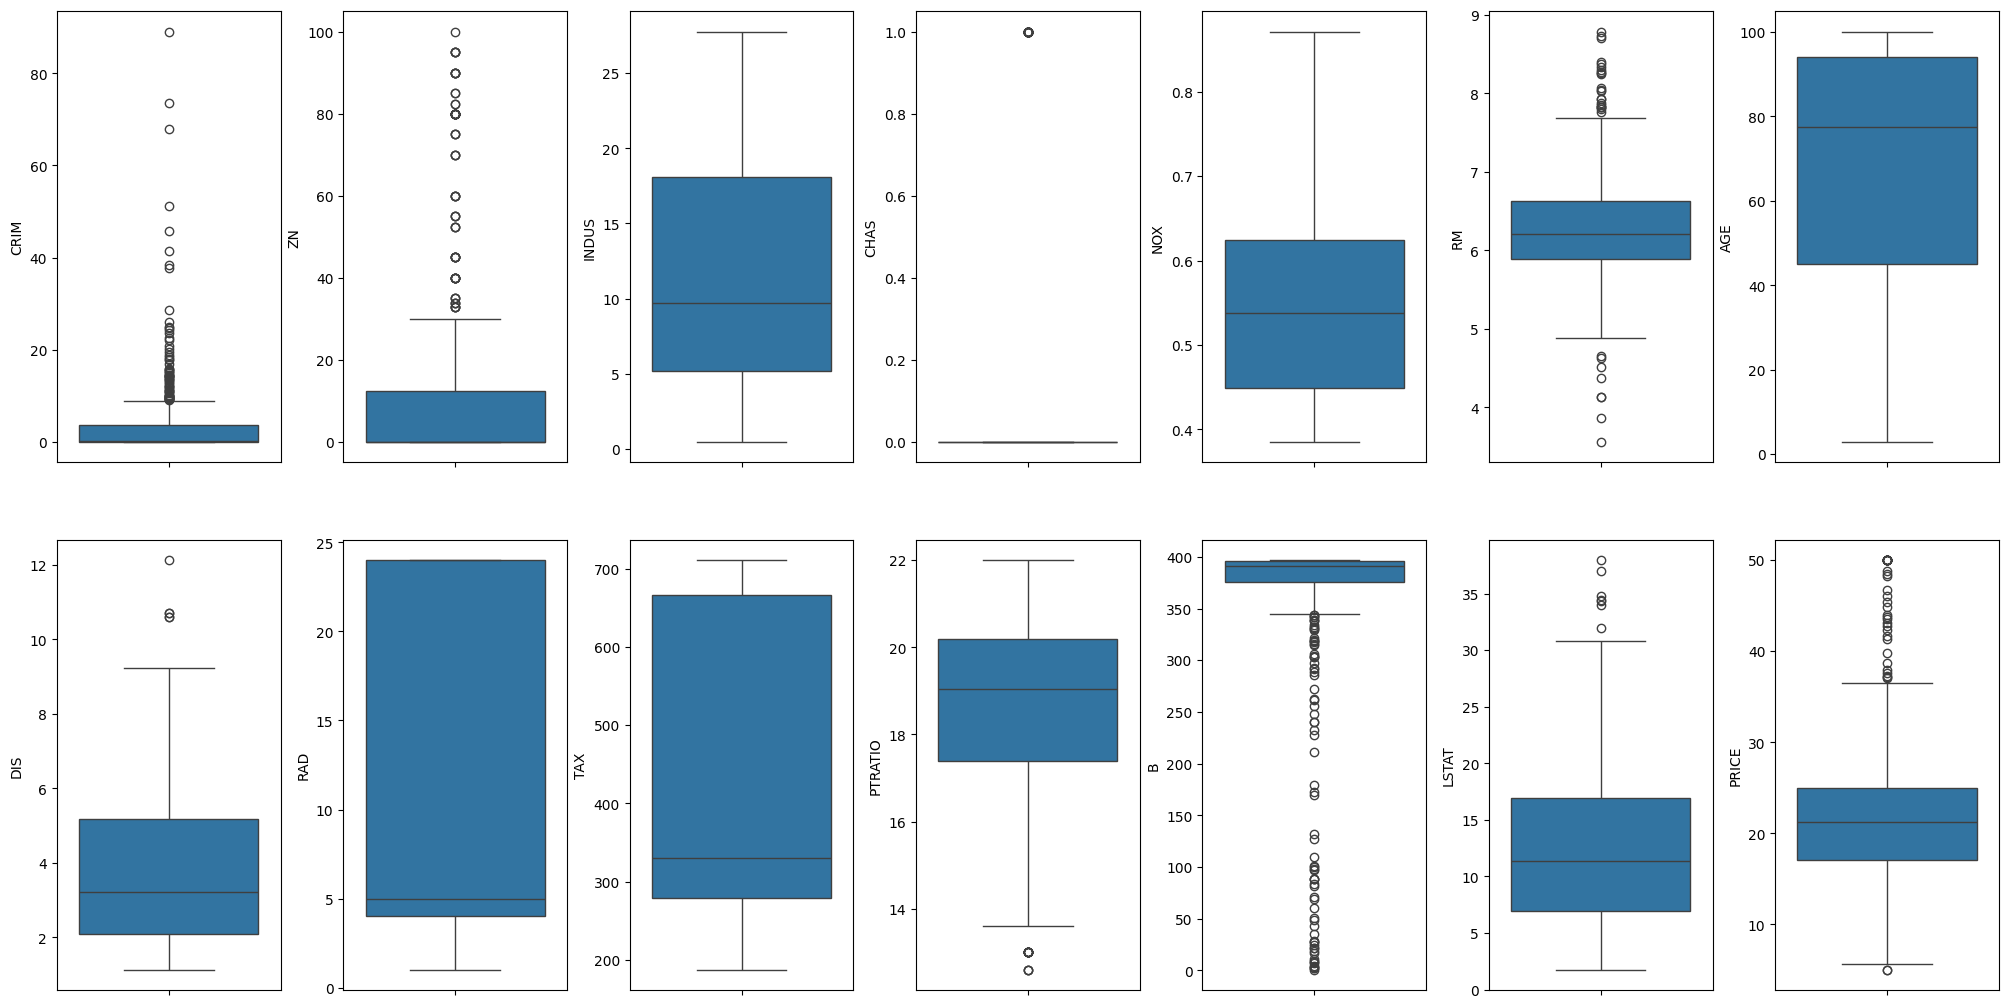

In [9]:
fig,axs=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
axs=axs.flatten() #  convert the multi-dimensional array of subplots into a 1D array
for k,v in data.items():
  sns.boxplot(y=k,data=data,ax=axs[index])  # used to select specific subplot from an array of subplot
  index+=1
  plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

for k,v in data.items():
  q1=v.quantile(0.25)
  q3=v.quantile(0.75)
  iqr=q3-q1
  v_col=v[(v<=q1-1.5*iqr)|(v>= q3+1.5*iqr)]
  perc=np.shape(v_col)[0]*100/np.shape(data)[0]
  print('Column %s outliers = %.2f%%' % (k,perc))
  # %s is replaced by the value of k, and %.2f is replaced by the value of perc (with two decimal places).

In [10]:
v_col.shape

(40,)

In [11]:
data = data[~(data['PRICE'] >= 50.0)]
print(np.shape(data))

(490, 14)


<Axes: >

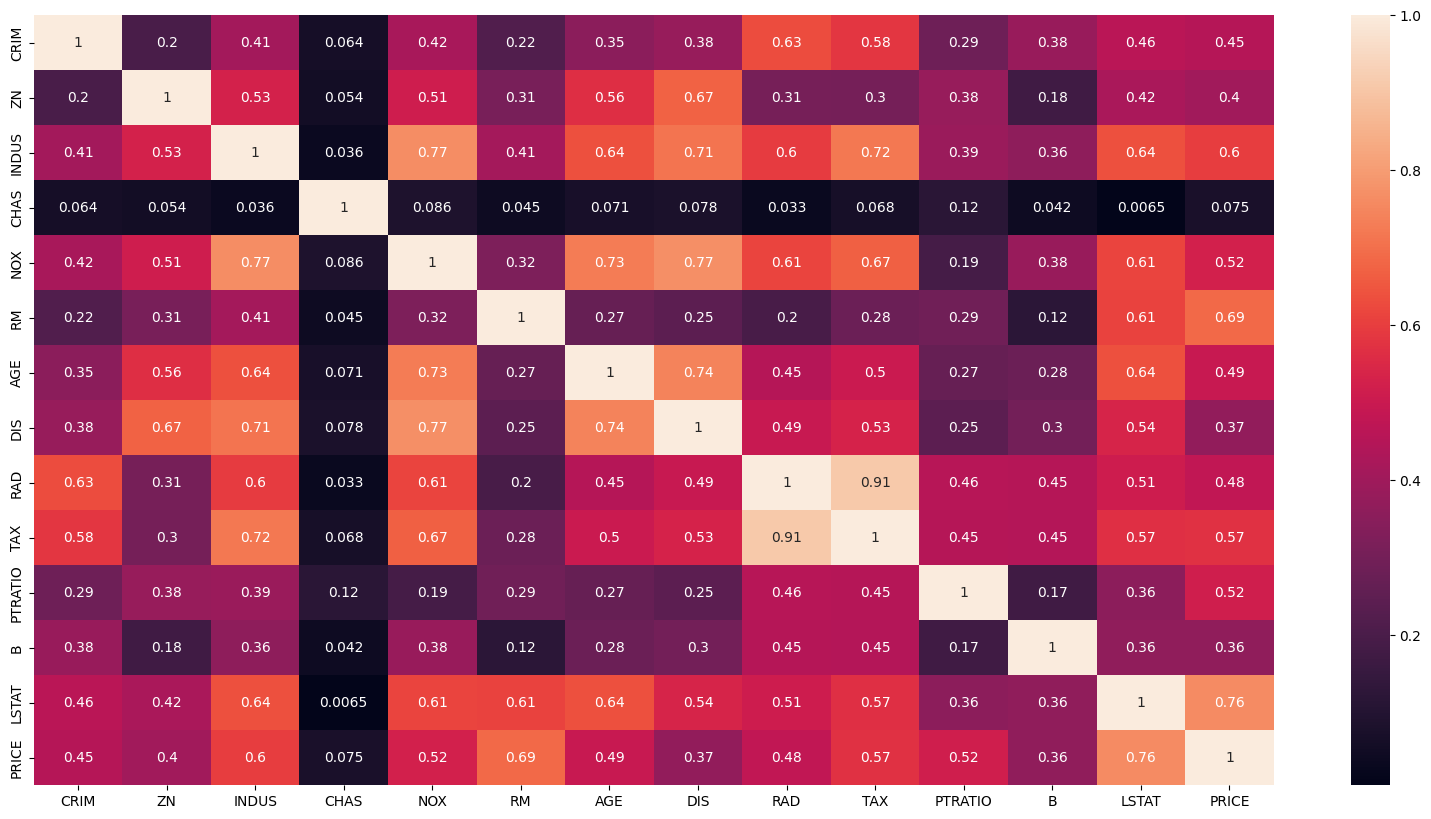

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr().abs(),annot= True)

**Simple linear regression**

In [13]:
x=data[['LSTAT']]
y=data['PRICE']

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
y_pred=lr.predict(x)

In [15]:
print('Coefficients :',lr.coef_)
print('Intercept :',lr.intercept_)

Coefficients : [-0.84373838]
Intercept : 32.5404103783323


In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('mean_squared_error :',mean_squared_error(y,y_pred))
print('r2_score  :',r2_score(y,y_pred))

mean_squared_error : 26.092834440020287
r2_score  : 0.57735301258215


(0.0, 51.4578419067231)

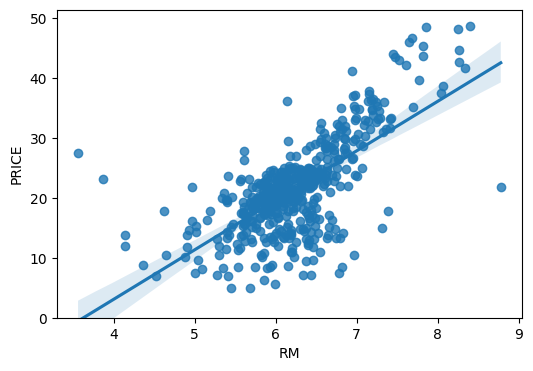

In [17]:
width = 6
height = 4
plt.figure(figsize=(width, height))
sns.regplot(x="RM", y="PRICE",data=data)
plt.ylim(0,)

(0.0, 51.32141167868092)

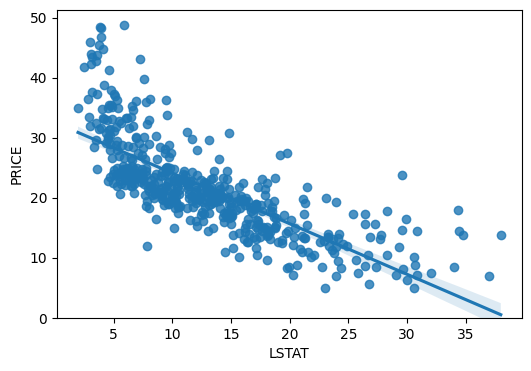

In [18]:
width = 6
height = 4
plt.figure(figsize=(width, height))
sns.regplot(x='LSTAT', y="PRICE",data=data)
plt.ylim(0,)

Comparing the regression plot of "RM" and "LSTAT" we see that the points for "LSTAT" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

In [19]:
data[['RM','LSTAT','PRICE']].corr()

,RM,LSTAT,PRICE
RM,1.000000,-0.610369,0.686634
LSTAT,-0.610369,1.000000,-0.759837
PRICE,0.686634,-0.759837,1.000000


**Multiple linear regression**

In [20]:
x=data.drop(columns='PRICE')
y=data['PRICE']

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
y_pred=lr.predict(x)

In [22]:
print('Coefficients :',lr.coef_)
print('Intercept :',lr.intercept_)

Coefficients : [-1.06715912e-01  3.53133180e-02 -4.38830943e-02  4.52209315e-01
 -1.23981083e+01  3.75945346e+00 -2.36790549e-02 -1.21096549e+00
  2.51301879e-01 -1.37774382e-02 -8.38180086e-01  7.85316354e-03
 -3.50107918e-01]
Intercept : 32.22984166993335


**Model Evaluation using Visualization**

<ipython-input-23-c21eb7ce09b3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
<ipython-input-23-c21eb7ce09b3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

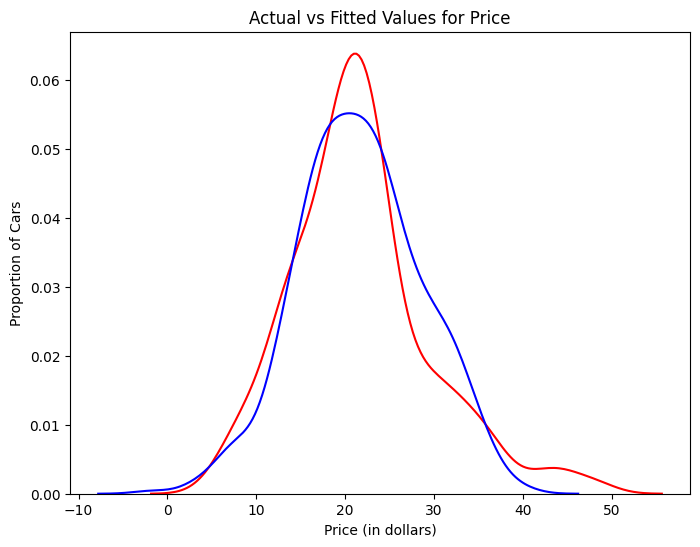

In [23]:
width = 8
height = 6
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

In [24]:
# multicollinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

    feature        VIF
0      CRIM   2.097665
1        ZN   2.837504
2     INDUS  14.576010
3      CHAS   1.128592
4       NOX  73.518782
5        RM  86.441826
6       AGE  21.242117
7       DIS  15.051100
8       RAD  14.830739
9       TAX  60.038288
10  PTRATIO  89.917328
11        B  19.529654
12    LSTAT  12.175334


In [26]:
print('Coefficients :',lr.coef_)
print('Intercept :',lr.intercept_)

Coefficients : [-1.06715912e-01  3.53133180e-02 -4.38830943e-02  4.52209315e-01
 -1.23981083e+01  3.75945346e+00 -2.36790549e-02 -1.21096549e+00
  2.51301879e-01 -1.37774382e-02 -8.38180086e-01  7.85316354e-03
 -3.50107918e-01]
Intercept : 32.22984166993335


**Residual error :**

In [27]:
res = (y - y_pred)
res_mean=np.mean(res)
res_mean

-6.162870667306991e-15

<ipython-input-28-0ce13057e3b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


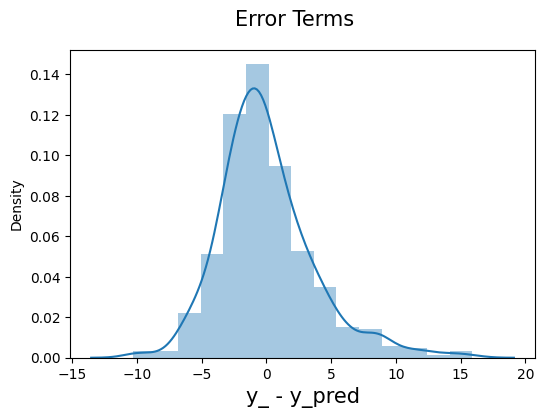

In [28]:
fig = plt.figure(figsize=(6,4))
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_ - y_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

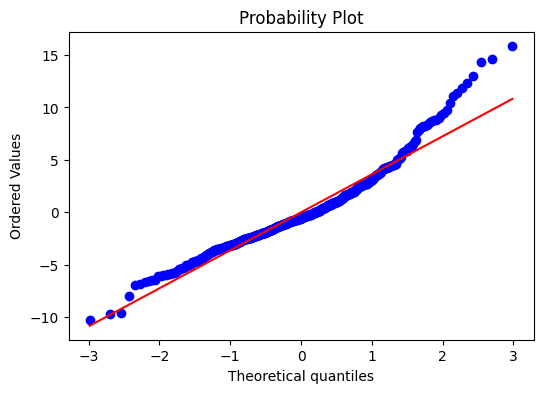

In [29]:
# QQ Plot
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(res, plot=ax, fit=True)
plt.show()

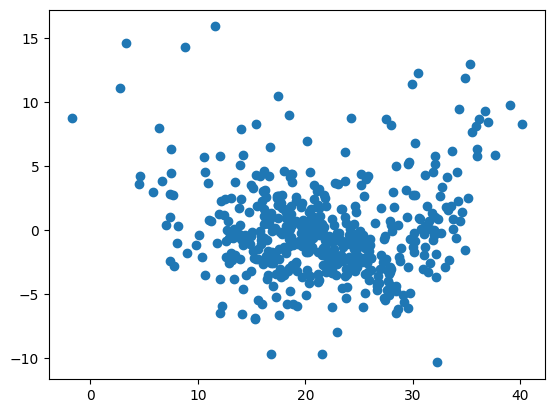

In [30]:
# Homoscedasticity
plt.scatter(y_pred,res)
plt.show()

**model evaluation :**

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R2_SCORE): {r2:.2f}")

Mean Squared Error (MSE): 13.73
Mean Absolute Error (MAE): 2.73
Root Mean Squared Error (RMSE): 3.70
R-squared Score (R2_SCORE): 0.78


**We can say that ~ 74.0 % of the variation of price is explained by this multiple linear regression.**





**Training and Testing**

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

lr.fit(x_test,y_test)
lr.fit(x_train,y_train)

y_pred_test=lr.predict(x_test)
y_pred_train=lr.predict(x_train)

**model evaluation :**

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse_test = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse_test)
r2 = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mse_train)
r2 = r2_score(y_train, y_pred_train)

In [34]:
print(f"Mean Squared Error (MSE)(test): {mse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R2_SCORE): {r2:.2f}")
print('------------------------------------')
print(f"Mean Squared Error (MSE)(train): {mse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R2_SCORE): {r2:.2f}")

Mean Squared Error (MSE)(test): 14.38
Mean Absolute Error (MAE): 2.76
Root Mean Squared Error (RMSE): 3.70
R-squared Score (R2_SCORE): 0.78
------------------------------------
Mean Squared Error (MSE)(train): 13.65
Mean Absolute Error (MAE): 2.76
Root Mean Squared Error (RMSE): 3.70
R-squared Score (R2_SCORE): 0.78


The values of MSE, MAE, and RMSE on the testing data are higher than those on the training data.

This indicates that the model's predictions are less accurate on the testing data compared to the training data.

<ipython-input-35-e2bda8f33bc3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, color="r", label="Actual Value", ax=ax1)
<ipython-input-35-e2bda8f33bc3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_train, hist=False, color="b", label="Predicted 

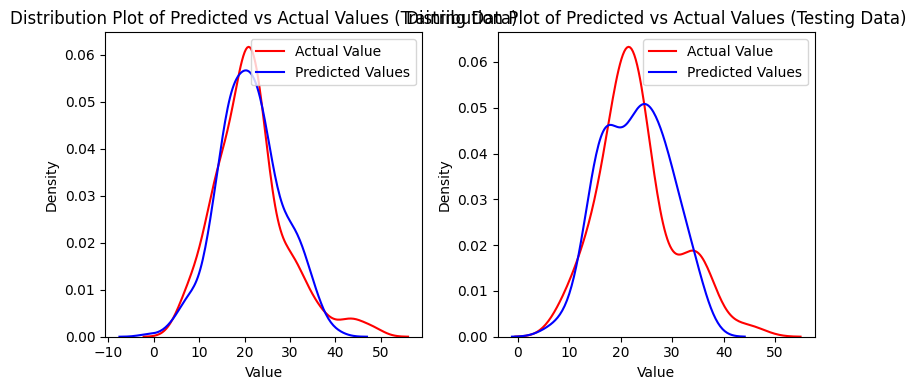

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Distribution plot for training data
sns.kdeplot(y_train, color="r", label="Actual Value", ax=ax1)
sns.kdeplot(y_pred_train, color="b", label="Predicted Values", ax=ax1)
ax1.set_title('(Training Data)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.legend()

# Distribution plot for testing data
sns.kdeplot(y_test, color="r", label="Actual Value", ax=ax2)
sns.kdeplot(y_pred_test, color="b", label="Predicted Values", ax=ax2)
ax2.set_title('(Testing Data)')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()

Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data.

The values of MSE, MAE, and RMSE on the testing data are higher than those on the training data.

This indicates that the model's predictions are less accurate on the testing data compared to the training data

**Grid Search**

The term Alfa is a hyperparameter, sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [36]:
from sklearn.model_selection import GridSearchCV ,train_test_split
from sklearn.linear_model import Ridge

In [37]:
x=data.drop(columns='PRICE')
y=data['PRICE']

In [38]:
parameters1 = [{'alpha': [0.0001,0.001,0.01, 0.1, 1,5,10,50,80,90,100,200,400,1000,10000]}]
parameters1

RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=3)
Grid1.fit(x_test,y_test)
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10)

In [39]:
BestRR.score(x_test,y_test)

0.7721358852872076